## FINITE VOLUME METHOD OF 1-D TRANSIENT DIFFUSION EQUATION

### EXAMPLE 8.2 Found on Page 253 of "An Introduction to Computational Fluid Dynamics" by H.K. Versteeg et.al.

## PART 1: DESCRIPTION

### General Discretized Equation of FVM using Implicit Scheme is given as
  

  $\rho_c [\frac{Tp-Tp^0}{\delta{t}}] \delta{x} = [\frac{k_e [T_E-T_P]}{\delta{x_e}} - \frac{k_w [T_P-T_W]}{\delta{x_w}}]$                                                                                                       

### which can be written in the form 

$a_PT_P$ = $a_ET_E$ + $a_WT_W$ + $a_P^0T_P^0$

### Nodes 2,3 and 4

$250 T_P = 25 T_E + 25 T_W + 200 T_P^0$

### Node 1

$T_P - T_W = 0$

$225 T_P = 25 T_E + 200 T_P^0$

### Node 5

$T_B = T_E$

$275 T_P = 50 T_B + 25 T_W + 200 T_P^0$

## PART 2: CODING

### Step 1: Import Necessary Libraries 

In [186]:
import numpy as np
import matplotlib.pyplot as plt

### Step 2: Declare Variables and Initializations

In [193]:
nx = 5
ts = 40
dx = 0.004*100
dt = 2
nt = (ts/dt) + 1
k = 10
rho = 10**7/100
A = np.zeros((nx,nx))
T = np.zeros(nx)
B = np.zeros(nx)

### Step 3: Fill Coefficient Matrix and Known (RHS) Vector

In [210]:
tt = T
tt[:] = 200
print(tt)
nx = int(nx)
nt = int(nt)
for i in range(nt):
    tt0 = tt
    nx = int(nx)
    for j in range(nx):
            if j == 0:
                    aE = k/dx
                    aP0 = rho * dx/(dt * 100)
                    aP = aP0 + aE
                    A[0,0] = aP
                    A[0,1] = -aE
                    B[0] = 200 * tt0[0]
            elif j==4:
                    aW = k/dx
                    aE = k/(dx/2)
                    aP0 = rho * dx/(dt * 100)
                    aP = aP0 + aW + aE
                    A[j,j-1] = -aW
                    A[j,j] = aP
                    B[j] = 200 * tt0[j]      
            else:
                    aW = k/dx
                    aE = k/dx
                    aP0 = rho * dx/(dt*100)
                    aP = aP0 + aW + aE
                    A[j,j-1] = -aW
                    A[j,j] = aP
                    A[j,j+1] = -aE
                    B[j] = 200 * tt0[j]
         

            X = np.linalg.inv(A).dot(B)
            tt = X

[200. 200. 200. 200. 200.]


### VISUALIZATION

In [227]:
T = np.zeros(7)
T[0] = tt[0]
T[6] = 0 
for i in range(1,6):
    T[i] = tt[i-1]
    print(T)

[185.97195341 185.97195341   0.           0.           0.
   0.           0.        ]
[185.97195341 185.97195341 174.38781592   0.           0.
   0.           0.        ]
[185.97195341 185.97195341 174.38781592 147.60649096   0.
   0.           0.        ]
[185.97195341 185.97195341 174.38781592 147.60649096 101.36883505
   0.           0.        ]
[185.97195341 185.97195341 174.38781592 147.60649096 101.36883505
  36.49819282   0.        ]


<function matplotlib.pyplot.show(*args, **kw)>

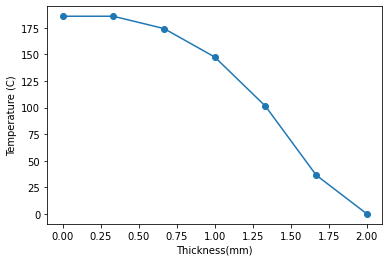

In [250]:
xx = np.linspace(0,2,7)
plt.grid
plt.plot(xx,T,'-o')
plt.xlabel('Thickness(mm)')
plt.ylabel('Temperature (C)')
plt.show




### REMARK

####  Soluition is in a good agreement with that of the solution of the problem of the stated book, 
#### as well as with that of the Analytical Solution 